<a href="https://colab.research.google.com/github/msolorzan/TensorFlow-projects/blob/main/linear_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/drive/Othercomputers/Mi portátil/Drive/train.csv')
test = pd.read_csv('/content/drive/Othercomputers/Mi portátil/Drive/test.csv')

In [ ]:
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [ ]:
train.dropna(inplace = True)

In [ ]:
X_train, y_train, X_test, y_test = train.x, train.y, test.x, test.y

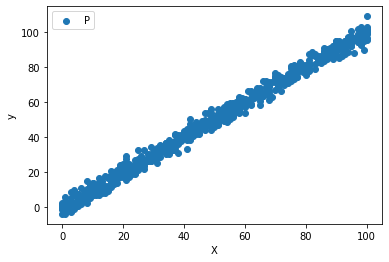

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.legend('Puntos')
plt.show()

In [ ]:
tf.random.set_seed(42)

# Crear modelo
linear_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compilar modelo
linear_regression.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
    metrics = ['mae', 'mse']
)

# Ajustar modelo
linear_regression.fit(X_train, y_train, epochs = 500, verbose = 2)

Epoch 1/500
22/22 - 0s - loss: 22.0984 - mae: 22.0984 - mse: 659.9609 - 456ms/epoch - 21ms/step
Epoch 2/500
22/22 - 0s - loss: 15.8901 - mae: 15.8901 - mse: 346.4336 - 34ms/epoch - 2ms/step
Epoch 3/500
22/22 - 0s - loss: 9.6196 - mae: 9.6196 - mse: 131.2659 - 37ms/epoch - 2ms/step
Epoch 4/500
22/22 - 0s - loss: 3.9232 - mae: 3.9232 - mse: 24.7479 - 41ms/epoch - 2ms/step
Epoch 5/500
22/22 - 0s - loss: 2.3072 - mae: 2.3072 - mse: 8.4190 - 37ms/epoch - 2ms/step
Epoch 6/500
22/22 - 0s - loss: 2.2505 - mae: 2.2505 - mse: 7.9728 - 33ms/epoch - 1ms/step
Epoch 7/500
22/22 - 0s - loss: 2.2310 - mae: 2.2310 - mse: 7.8941 - 36ms/epoch - 2ms/step
Epoch 8/500
22/22 - 0s - loss: 2.2388 - mae: 2.2388 - mse: 7.9408 - 34ms/epoch - 2ms/step
Epoch 9/500
22/22 - 0s - loss: 2.2412 - mae: 2.2412 - mse: 7.9065 - 32ms/epoch - 1ms/step
Epoch 10/500
22/22 - 0s - loss: 2.2384 - mae: 2.2384 - mse: 7.9241 - 33ms/epoch - 2ms/step
Epoch 11/500
22/22 - 0s - loss: 2.2385 - mae: 2.2385 - mse: 7.9156 - 40ms/epoch - 2ms/

In [ ]:
# Evaluar el desempeño de la red neuronal con el vector de prueba
linear_regression.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 2.4174 - mae: 2.4174 - mse: 9.4569


[2.417393922805786, 2.417393922805786, 9.456947326660156]

In [ ]:
linear_regression

In [ ]:
# Graficar predicciones
y_pred = linear_regression.predict(X_test)

y_pred = np.squeeze(y_pred)

y_pred.shape, X_test.shape

((300,), (300,))

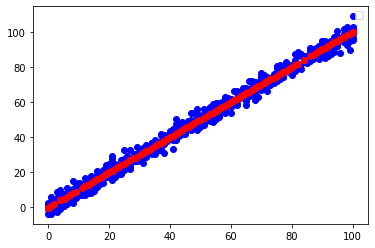

In [ ]:
plt.scatter(X_train, y_train, c = 'b')
plt.scatter(X_test, y_pred, c = 'r')
plt.legend()
plt.show()

In [ ]:
linear_regression.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
saved_linear_regression = linear_regression.save('modelo1_de_regresion_lineal_kaggle.h5')